In [2]:
# Lecture 4: Variance Reduction

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 1. Control Variates

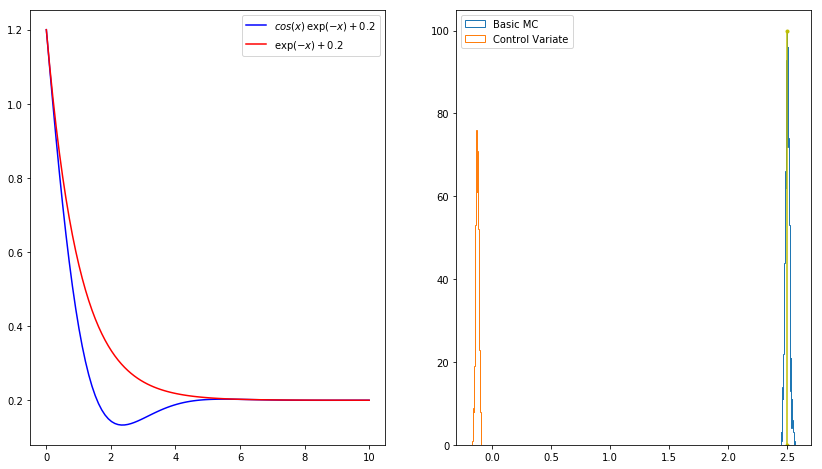

In [9]:
plt.figure(figsize=[14,8])

xmax = 10
xmin = 0
N=10000



# ==================================
# derivative of the function
# =================================
f = lambda x: np.cos(x)*np.exp(-x)+0.2;
g = lambda x: np.exp(-x)+0.2;
fint= lambda z: z/5.0+ 0.5*np.exp(-z)*(np.sin(z)-np.cos(z))
 

# ============================
# plot it
# ============================
x = np.linspace(0,10, 100)

plt.subplot(1,2,1)
plt.plot(x, f(x), 'b', label=u'$cos(x)\, \exp(-x)+0.2$') 
plt.plot( x, g(x), 'r', label = u'$\exp(-x)+0.2$')
plt.legend()

Ivmc = np.zeros(1000)
Imc_vr = np.zeros(1000)


#exact value 
true_val = fint(xmax) - fint(xmin)

tau =(1.0/(xmax-xmin))*(np.var(fint(xmax))-np.var(fint(xmin))) # something wrong here

# DO THIS FEW TIMES
for k in np.arange(0,1000):

    # ----------------------
    # lets do the normal MC
    # ----------------------

   
    X = np.random.uniform( low=xmin, high=xmax, size=N)
    Ivmc[k] = (xmax-xmin)*np.mean(f(X));

    # ----------------------
    # CONTROL VARIATE
    # ----------------------
    
    q = np.cov(g(X),f(X));
    
    b =- q[0,1]/np.var(g(X));
       
 
    
    
    Imc_vr[k] = (xmax-xmin)*(np.mean(f(X)) + b *(np.mean(g(X)) -tau));




yreal = true_val*np.ones(30);

plt.subplot(1,2,2)
plt.hist(Ivmc,30, histtype='step', label=u'Basic MC');
plt.hist(Imc_vr,30, histtype='step', label = u'Control Variate');
plt.plot([true_val, true_val], [0 ,100], 'y.-') 
plt.legend()

In [10]:
# 2. Antithetic Variates

In [12]:
Y1= np.random.uniform(low=0, high=1, size=10000)
Y2a= np.random.uniform(low=0, high=1, size=10000)

rho =-0.9

Y2 = Y1*rho + np.sqrt(1-rho**2) * Y2a

Z= 0.5*(Y1+Y2)
print (np.var(Z), np.var(Y1), np.var(Y2), np.cov(Y1,Y2))

0.004142914132569109 0.08377569612015964 0.0842659809707802 [[ 0.08378407 -0.07574258]
 [-0.07574258  0.08427441]]


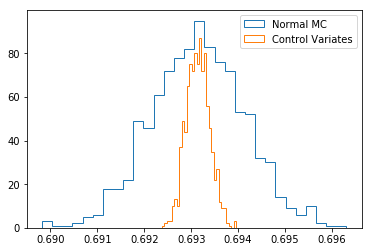

In [13]:
N =10000
xmin = 0 
xmax = 1


# ==============================
# DEFINE FUNTION 
# ==============================
Y = lambda x:  1/(x+1)
intY = lambda x: np.log(x+1) 

Iact = intY(xmax)-intY(xmin)

Ivmc=np.zeros(1000)
Iant=np.zeros(1000)
# ==============================
# GENERATING THE SAMPLE X1, X2 iid 
# and X1 amd Y1 negatively correlated 
# ==============================
for k in np.arange(0,1000):
    U = np.random.uniform(low=0, high=1, size=2*N)
    X=U



    # ==============================
    # VANILLA MC
    # ==============================
    Ivmc[k] =  np.mean(Y(X))

    # ==============================
    # ANTITHETIC MC
    # ==============================
    U = np.random.uniform(low=0, high=1, size=N) 
    X1= U
    X2= 1-U
    Iant[k] = 0.5*( np.mean(Y(X1))+np.mean(Y(X2)))


plt.hist(Ivmc,30, histtype='step', label=u'Normal MC')
plt.hist(Iant,30,  histtype='step', label=u'Control Variates')
plt.legend()

In [14]:
# 3. Stratified Method

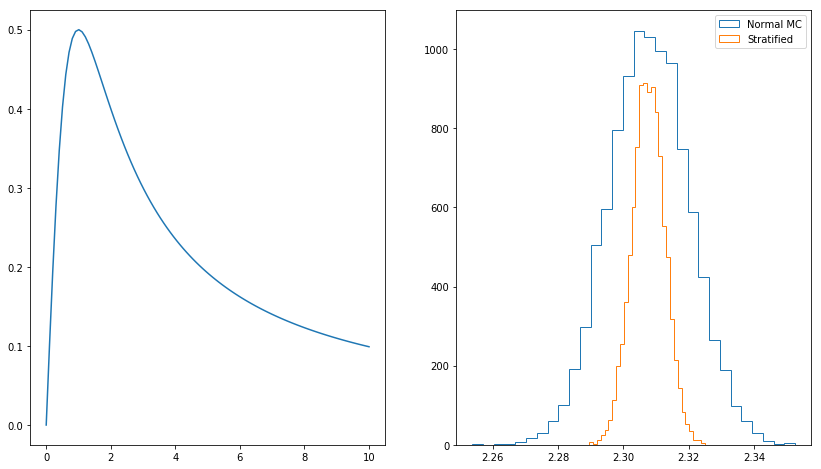

In [17]:
plt.figure(figsize=[14,8])
Y = lambda x: x/(x**2+1.0);
intY = lambda x: np.log(x**2 + 1.0)/2.0;

## Ploting the original functions 
plt.subplot(1,2,1)
x = np.linspace(0,10,100)
plt.plot(x, Y(x), label=u'$x/(x**2+1)$')

N= 10000
M = 10   # number of strate 

xmin=0
xmax =10

# analytic solution 
Ic = intY(xmax)-intY(xmin)

Imc = np.zeros(N)
Is = np.zeros(N)
for k in np.arange(0,N):
 
    Umin=0
    Umax =10
    # First lets do it with mean MC method 
    U = np.random.uniform(low=Umin, high=Umax, size=N)
    Imc[k] = (Umax-Umin)* np.mean(Y(U))

    #stratisfied it in Ns regions
    step = (Umax-Umin )/M
    Umin = 0 
    Umax = step
    Ii = 0
    
    
    for reg in np.arange(0,M):
        x = np.random.uniform(low=Umin, high=Umax, size=int(1.0*N/M)) # something wrong
        Ii = Ii+(Umax-Umin)* np.mean(Y(x))
        Umin = Umin + step
        Umax = Umin + step


    Is[k] = Ii

plt.subplot(1,2,2)
plt.hist(Imc,30, histtype='step', label=u'Normal MC')
plt.hist(Is, 30, histtype='step', label=u'Stratified')
plt.legend()

In [ ]:
# http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-4.html

In [18]:
# maybe the author intenionsally left some bugs in the codes